<img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/NSF-Unidata_lockup_vertical_2023.png" width="150px" align="right">

# Machine Learning Analysis in the Earth Systems Sciences

In this module, you are tasked with planning, implementing, and evaluating a machine learning solution for a real-world scenario. Given pre-configured code blocks and prepared data, you will create a problem statement, explore the data, experiment with model development, and ultimately make a recommendation on the utility of machine learning for your scenario.

# Damaged weather station in western North Carolina

Play the video below to learn about the situation.

<video width="600" controls><source src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/stationsintrovideo_i1_nojupyterdemo.mp4" type="video/mp4">
</video>

<a href="https://www.google.com/url?q=https://docs.google.com/document/d/e/2PACX-1vRfYtUFjLVfNadQ0nvUv4E8MzfaXmQwt_WcP0haCo5bH1J0zGZiupiJz7XuLsun2BqN-g_ubbACpx6p/pub&sa=D&source=docs&ust=1738596555923034&usg=AOvVaw2xJ1FEg1SflwC6i3P5uQqD" target="blank">Transcript</a>

<div class="alert alert-info" role="alert">
<p class="admonition-title" style="font-weight:bold">What is a data engineer?</p>
    <p>Your team includes yourself, your team lead, and a data engineer. Data engineering is an emerging career that encompasses the collection, storage, and pre-processing of data in data science disciplines. You will see the type of work that the data engineer on your team does in <i>Part 2: Data Handling.</i></p>
    <p><a href="https://www.mongodb.com/resources/basics/data-engineering#what-is-data-engineering" target="blank">Learn more</a></p>
</div>
<br><br>

Now you will begin the process of following the supervised machine learning model framework to address this task, starting with <b>problem framing</b>.
<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>
<br><br>

## Part 1: Problem Framing

Based on the information provided in the video, which type of machine learning analysis is most appropriate for this scenario? 

> **Instructions**
> 
> Execute the two cells below. After executing `display_quiz()`, select the corresponding button to check your understanding.

In [3]:
# First import the Python tools needed to display the buttons
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output, HTML, IFrame

from button_tech import display_quiz

In [4]:
display_quiz()

Output()

<br>

#### Problem framing questions
As a part of the problem framing step, we must answer a series of questions to ensure we're creating the best solution for this scenario. 

***Does a simpler solution exist?***

&emsp;From the video, we know that your team has already completed a preliminary analysis that averaged values from nearby stations to Mt Mitchell. While these results showed some skill, there is room for improvement. 

***Can machine learning requirements be met?***

&emsp;The NC ECONet data provider has decades of hourly data available from several weather stations. This is sufficient for your model. 

***Which scientific question should be answered?***

&emsp;You will answer this question in **Exercise 1** below. 

<br>

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 1</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 1. Then type the scientific question to be answered for this situation.</p>
</div>
<br><br>

## Part 2: Data Handling

<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>
<br><br>

Recall that data preparation is often the most time-consuming step of developing a machine learning model. Data handling comes in three parts:
1. Locate data of interest
2. Explore data
3. Create a data splitting strategy

Your team's data engineer has located the data and completed the pre-processing for you already, and you will follow with your own independent exploration of the data and strategy for data splitting. 

<br>

### Part 2a: Locate Data of Interest

You will be using other stations in the <a href="https://econet.climate.ncsu.edu/" target="blank">NC ECONet</a> for this project. Below is a document that your team's data engineer has prepared for you describing the nature of the dataset that will be used to create the machine learning model. <br><br>

<div class="alert alert-info" role="alert">

### Metadata Document for Western North Carolina Weather Station Data

#### General Information

Dataset Name: Western NC Weather Station Time-Series Data

Description: This dataset contains tabular time-series data collected from multiple weather stations in Western North Carolina. The data includes atmospheric and environmental variables recorded at hourly intervals.

Date Range: January 1, 2015, to December 16, 2024

Geographic Coverage: Western North Carolina 

Data Frequency: Hourly

Last Updated: Jan 1, 2025

#### Data Structure

File Format: .parquet

Number of Records: 69,760 per station per feature

Columns (Features) 

- observation_datetime: Date and time of observation in UTC

Columns (features) per Station (XXXX):

- XXXX_airtemp_degF (°F): Air temperature measured at 2 meters above ground level
- XXXX_windspeed_mph (mph): Average wind speed during the hour at 10 meters above ground level
- XXXX_winddgust_mph (mph): Peak wind gust during the hour at 10 meters above ground level
- XXXX_rh_percent (%): Average Relative humidity
- XXXX_precip_in (in): Total precipitation accumulated in the hour

Stations:

- BEAR (Bearwallow Mountain)
- BURN (Burnsville Tower)
- FRYI (Frying Pan Mountain)
- JEFF (Mount Jefferson Tower)
- **MITC (Mount Mitchell State Park) - target station**
- NCAT (North Carolina A&T University Research Farm)
- SALI (Piedmont Research Station)
- SASS (Sassafrass Mountain)
- UNCA (University of North Carolina - Asheville Weather Tower)
- WINE (Wayah Bald Mountain)

<a href="https://econet.climate.ncsu.edu/" target="blank">More station info</a>

#### Data Quality

Missing Data: Missing data besides MITC was filled in using seasonal values and basic interpolation.

Outlier Handling: No outlier handling was done. 

#### Data Provenance

Source: North Carolina State Climate Office ECONet, <a href="https://econet.climate.ncsu.edu" target="blank">https://econet.climate.ncsu.edu/about/</a>

</div>
<br><br>

### Part 2b: Explore Data

While your data engineer colleague prepared the data for your model and created the metadata document, you will still need to familiarize yourself with the data before you use it as input to a machine learning algorithm. In this step, you will take a closer look at the potential features for your model with a few plots. 

First, let's read the data into this workspace. The data resides on a remote THREDDS Data Server, which allows users to access data without manually downloading files to your computer. When you execute the code cell below, you will load the Python library `pandas` that includes all the tools for reading the data from the THREDDS Data Server and opening it in this workspace. 

> **Instructions**
> 
> Execute the  cell below
> 
> *This may take a moment to complete.*

In [5]:
# Import the pandas Python library that can interpret the data file
import pandas as pd

# Location of the data on the THREDDS data server
file_path = 'https://thredds.ucar.edu/thredds/fileServer/cybertraining/CyberTraining_NC_ECOnet_data.parquet'

# Read data into this workspace
df = pd.read_parquet(file_path) 

The ***target features*** (the features that we are trying to predict with the machine learning model) are temperature, relative humidity, wind speed, wind gust, and precipitation at the Mt. Mitchell station. All other station data are possible ***input features*** to the model. 

#### Explore target features

Let's now explore just the target features at Mt. Mitchell.  


> **Instructions**
> 
> Execute the two cells below.
> 
> In the Mt. Mitchell plotting widget, select the environmental variable and plot type from the dropdowns, then select Plot to reveal the plot.
>
> Repeat for any and all variales you want to explore to better understand the data at Mt. Mitchell.

In [6]:
from button_tech import display_mt_mitchell_weather_dashboard

In [7]:
display_mt_mitchell_weather_dashboard(df)

HTML(value='<h3>Mt. Mitchell</h3>')

Dropdown(description='Variable:', options=(('Temperature (F)', 'MITC_airtemp_degF'), ('Average Wind Speed (mph…

Dropdown(description='Plot type:', options=('Histogram', 'Time Series'), value='Histogram')

Button(description='Plot', style=ButtonStyle())

Output()

#### Explore input features

Now explore the ***input features***. Below is a map of where the stations are located in relation to MITC. Click on the image below to open an interactive map.

<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/plotlystationmap.html" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/stationmap_plotly.png"></a><br>
<i>Click to open interactive map</i></center>

> **Instructions**
> 
> Execute the two cells below.
>
> In the Input Stations plotting widget, select the station, environmental variable, and plot type from the dropdowns. Then select Plot to reveal the plot.
>
> Repeat for any and all variables you want to explore to better understand the data at each station.

In [8]:
from button_tech import display_input_stations_dashboard

In [9]:
display_input_stations_dashboard(df)

HTML(value='<h3>Input Stations</h3>')

Dropdown(description='Station:', options=('BEAR', 'BURN', 'FRYI', 'JEFF', 'NCAT', 'SALI', 'SASS', 'UNCA', 'WIN…

Dropdown(description='Variable:', options=(('Temperature (F)', 'airtemp_degF'), ('Average Wind Speed (mph)', '…

Dropdown(description='Plot type:', options=('Histogram', 'Time Series'), value='Histogram')

Button(description='Plot', style=ButtonStyle())

Output()

#### Compare stations
We can also plot direct comparisons of stations in our dataset by plotting data at each station in a grid of plots. In these comparison grids, the scatter plots display the observations at each station, for example, the temperature at MITC on the x-axis and the temperature at SASS on the y-axis. Stations that are well-correlated will show points that are generally clustered with very little spread. 

<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/wellcorrelated.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/wellcorrelated.png" width="200 px"></a> <a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/notwellcorrelated.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/notwellcorrelated.png" width="200 px"></a><br><i>Click to enlarge</i></center>

The grid displays histograms where the x- and y-axes are the same station. These are the same histograms that you plotted previously, displaying the distribution of all values at that station. 

> **Instructions**
> 
> Execute the two cells below.
>
> In the Comparison Plot plotting widget, select an environmental variable from the dropdown, then select Plot to reveal the plot.
> 
> Repeat for any and all variables you want to explore.

In [10]:
from button_tech import display_correlation_plot_dashboard

In [11]:
display_correlation_plot_dashboard()

HTML(value='<h3 style="font-weight: bold; margin: 0; padding: 0;">Comparison Plot</h3>')

Dropdown(description='Variable:', options=(('Temperature (F)', 'airtemp_degF'), ('Precipitation (in)', 'precip…

Button(description='Plot', style=ButtonStyle())

Output()

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 2b</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 2b. Then describe your exploratory data analysis of any target and input features of note. Include the following:
    <ul>
        <li>Do variables follow diurnal or annual patterns generally as expected?</li>
        <li>Do the variables have the expected ranges of values? Do any variables appear to include major outliers?</li>
        <li>Which stations appear to be most correlated to the variables at Mt Mitchell? Why?</li>
        <li>Include any <i>important</i> plots to illustrate your conclusions. Limit yourself to 5 plots. <br><i>To copy a plot image, hold shift, right click on the image, then select Copy.</i></li>
    </ul>
    </p>
</div>

<br>

### Part 2c: Create a data splitting strategy

Next we create a data splitting strategy. Data splitting refers to the process of dividing data into three groups: training, validation, and testing. Each of these groups represent a part of the iterative process for machine learning model development. 

- Training data is the largest subset, usually around 60-80% of the total data, and is used to initially train the model. 
- Validation data is roughly 10-20% of the total data, and is used to validate the effectiveness of the training process. 
- Testing data is also roughly 10-20% of the total data, and is used to test the final refined model before using it on new, unseen data.

Each group should be separate to ensure no single group will bias the model. In this model, the data will be randomly split into these groups, but you decide the proportions of data for each group. Input your percentages in the blanks below, ensuring all percentages equal 100%.

> **Instructions**
> 
> Execute the two cells below.
>
> In the Dataset Split Percentages widget, select the proportions of the total dataset you wish to use in each group by typing in each box. Use values 0-100, ensuring that the sum of all three boxes equals 100.
>
> Select Submit after making your selection.

In [12]:
from button_tech import create_percentage_widget

In [13]:
widget, get_values = create_percentage_widget()

> **Instructions**
> 
> Execute the three cells below to execute the functions to split the data according to the percentages you submitted above.

In [14]:
# This is used to grab the values from the widget above (no need to change)
decimals = get_values()
training = decimals['training']
validation = decimals['validation']
testing = decimals['testing']

In [15]:
from button_tech import split_data_temporal

In [16]:
# Use the function
X_train, y_train, X_val, y_val, X_test, y_test, X_true_test, y_true_test = split_data_temporal(df,
                                                                                               train_pct=training,
                                                                                               val_pct=validation,
                                                                                               test_pct=testing)

Data split summary:
Training period: 2017-01-01 00:00:00 to 2020-11-14 16:00:00
Training samples: 33921 (50.0% of pre-cutoff data)

Validation period: 2020-11-14 17:00:00 to 2023-03-12 16:00:00
Validation samples: 20352 (30.0% of pre-cutoff data)

Testing period: 2023-03-12 17:00:00 to 2024-09-28 00:00:00
Testing samples: 13568 (20.0% of pre-cutoff data)

True test period: 2024-09-28 01:00:00 to 2024-12-16 23:00:00
True test samples: 1919


<br><br><br>

## Part 3: Model Development
Next begins the iterative process of creating, evaluating, and refining your machine learning model. You will start with an initial model, and keep track of your subsequent trials in your Machine Learning Model Handbook. 
<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>

### Part 3a: Choose Algorithm
First, you will choose an algorithm to train. You have two options: the *XGBR Regressor* and the *MultiLinearRegressor*. Both have pros and cons for this task. Choose one for your initial model, but you may choose to test the other algorithm in subsequent trials. 

<div class="alert alert-info" role="alert">
    <p class="admonition-title" style="font-weight:bold">About the Algorithms</p>
    <p class="admonition-title" style="font-weight:bold">XGBR Regressor</p>
    <ul>
        <li>Handles a Wide Range of Data Distributions: XGBR is capable of modeling both linear and non-linear relationships, making it suitable for data with complex, varied distributions.</li>
        <li>Prone to Overfitting: XGBR can easily overfit to training data, especially when the dataset is small or noisy.</li>
    </ul>
    <p class="admonition-title" style="font-weight:bold">MultiLinearRegressor</p>
    <ul>
        <li>Simple and Interpretable: As a linear model, it is easy to understand and interpret, making it a great choice for those seeking clear relationships between features and predictions.</li>
        <li>Struggles with Non-Uniform Data Distributions: For datasets with non-linear patterns or skewed distributions, multiple linear regression may fail to capture the underlying patterns, leading to biased or inaccurate predictions.</li>
</div>

> **Instructions**
> 
> Execute the two cells below.
>
> After executing `algorithm_selection()`, select the corresponding button to select your desired algorithm.

In [17]:
from xgboost import XGBRegressor
import time 
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from button_tech import algorithm_selection

In [18]:
selected_algo = algorithm_selection()

Output()

### Part 3b: Choose input features

Given your data exploration, you must now choose the stations to use as input features. You may choose as many input stations as you'd like, however, recall that more stations does not always create a better model. Think strategically based on your evidence. 

<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/plotlystationmap.html" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/stationmap_plotly.png"></a><br>
<i>Click to open interactive map</i></center>

In [19]:
from button_tech import create_station_selector

In [20]:
station_selector = create_station_selector()

In [21]:
# Can this be combined with the above? User gets feedback on 
# selected stations in the widget above, but will need for 
# the evaluation metrics in Validation and Testing

# To get selected stations at any time:
def get_selected_stations(selector):
    return [station for station, checkbox in selector.items() if checkbox.value]

selected = get_selected_stations(station_selector)
selected 

['BEAR', 'BURN', 'JEFF', 'NCAT', 'SASS']

The next block of code will filter our dataset to just the stations we selected above. We need to do this for all our datasets (training, validation, testing, and final, true test with no MITC data).

In [22]:
from button_tech import filter_dataframe

In [23]:
X_train_filtered     = filter_dataframe(X_train,     selected)
X_val_filtered       = filter_dataframe(X_val,       selected)
X_test_filtered      = filter_dataframe(X_test,      selected)
X_true_test_filtered = filter_dataframe(X_true_test, selected)

Original DataFrame: 47 columns
Filtered DataFrame: 27 columns
Original DataFrame: 47 columns
Filtered DataFrame: 27 columns
Original DataFrame: 47 columns
Filtered DataFrame: 27 columns
Original DataFrame: 47 columns
Filtered DataFrame: 27 columns


### Part 3c: Train the Algorithm

The training process is what transforms the machine learning algorithm you just selected into a supervised machine learning model. Executing the cell below starts the process of the agorithm learning patterns and relationships in the training data.

In [24]:
from button_tech import train_model_button

In [25]:
model_choice = selected_algo()
trained_model = train_model_button(model_choice, X_train_filtered, y_train)

Output()

### Part 3c: Validate the Model

The validation step uses validation data to evaluate how well the training process performed. By using a separate dataset to evaluate performance, we get a better sense of how well the model can generalize to new inputs.

The cell below does several steps:
1. Import the Python libraries that calculate statistics
2. Make predictions with the validation dataset
3. Generate validation metrics
4. Print the validation metrics

<div class="alert alert-info" role="alert">
    <p class="admonition-title" style="font-weight:bold">About the Evaluation Metrics</p>
    <p class="admonition-title" style="font-weight:bold">Root Mean Square Error (RMSE)</p>
    <ul>
        <li>A measure of how large a typical prediction error is</li>
        <li>Reports error in the original units (degrees, %, mph, etc)
            <ul>
                <li>e.g., an error of 5 mph means the prediction may be ± 5 mph from the actual value</li>
            </ul>
        </li>
        <li>Better reflects the accuracy of predictions in real-world situations</li>
        <li>Dependent on the scale of the dataset, making comparisons among datasets more difficult</li>
    </ul>
    <p class="admonition-title" style="font-weight:bold">R²</p>
    <ul>
        <li>A measure of how well the model explains the variation in the dataset</li>
        <li>A standardized scale (0-1) for comparing models across different trials</li>
        <li>The closer to 1, the better the model accuracy</li>
        <li>Assumes that the input data have a linear relationship</li>
        <li>Only measures correlation among input data, cannot distinguish good and bad predictions</li>
    </ul>
</div>

In [26]:
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score

from button_tech import model_eval_MITC 

In [27]:
model_eval_MITC(trained_model(), X_test_filtered, y_test)

Validation Metrics

Model Type: MultiLinearRegressor

RMSE for each target feature:
 MITC_airtemp_degF:	3.5254
 MITC_windspeed_mph:	6.1276
 MITC_windgust_mph:	7.5708
 MITC_rh_percent:	17.4850
 MITC_precip_in:	0.0423

R² Score for each target feature:
 MITC_airtemp_degF:	0.9261
 MITC_windspeed_mph:	0.3887
 MITC_windgust_mph:	0.4766
 MITC_rh_percent:	0.2344
 MITC_precip_in:	0.4395

Average R² Score:	0.49


### Part 3d: Evaluate and Refine the Model

Examine the results of the model validation. What do each mean? Could they be improved? Review the descriptions of the evaluation metrics, then complete the next exercise. 

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3d</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 3d. </p>
    <p>Paste your evaluation metrics in the designated box. </p>
    <p>Then describe the results of your initial model validation. Include the following:</p>
    <ul>
        <li>Which variables have favorable evaluation metrics? Which variables don’t perform as well?</li>
        <li>How do you interpret these results in the context of the real-world situation?</li>
        <li>What changes will you make to try to improve these statistics in the next iteration?</li>
    </ul>
</div>

### Part 3e: Iterative Refinement Trials

Your first trial is complete! Now you'll create new trials to improve the evaluation metrics from the validation phase. Here's how:

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3e</p>
    <ol>
        <li>Return to <a href ="#Part-3a:-Choose-Algorithm">Part 3a: Choose Algorithm</a> and choose to either change or keep your algorithm</li>
        <li>Proceed to Part 3b to choose new stations, or keep the stations you already have</li>
        <li>Re-train your model</li>
        <li>Re-validate your model and review the evaluation metrics</li>
        <li><b>In your Machine Learning Model Handbook Exercise 3e,</b> paste the results of each trial, one per box.</li>
        <li>Repeat this process until you have metrics you are satisfied with, and move on to the next part below</li>
    </ol>
</div>

### Part 3f: Test Model

<div class="alert alert-warning" role="alert">
<p class="admonition-title" style="font-weight:bold">Important</p>
    For testing, your model needs to be in a state with your desired algorithm and input feature stations. If you haven't already, go back and run through parts 3a through 3c with your final choices one last time. This ensures that your final testing process will be executed with your desired choices. 
</div>

At this point, you have a trained and validated model with evaluation metrics you are satisfied with. Next, it's time to test the model on brand new data, the testing dataset. The testing process mimics how the model would be used in a real-world process in a final, unbiased way. 

Testing looks very similar to validation. The model makes predictions based on the input features in the testing dataset, then RMSE and R² are calculated. Execute the cell below to test the model and view the testing metrics. 

In [28]:
model_eval_MITC(trained_model(), X_val_filtered, y_val)

Validation Metrics

Model Type: MultiLinearRegressor

RMSE for each target feature:
 MITC_airtemp_degF:	3.5921
 MITC_windspeed_mph:	6.5173
 MITC_windgust_mph:	8.1841
 MITC_rh_percent:	17.3234
 MITC_precip_in:	0.0339

R² Score for each target feature:
 MITC_airtemp_degF:	0.9326
 MITC_windspeed_mph:	0.4869
 MITC_windgust_mph:	0.4506
 MITC_rh_percent:	0.5733
 MITC_precip_in:	0.2777

Average R² Score:	0.54


### Part 3g: Evaluate and Justify

With your model trained, validated, and tested, you can now plot the predicted model output alongside the real data before the Mt. Mitchell station went offline. You can use this information to help you address your final model justification. 

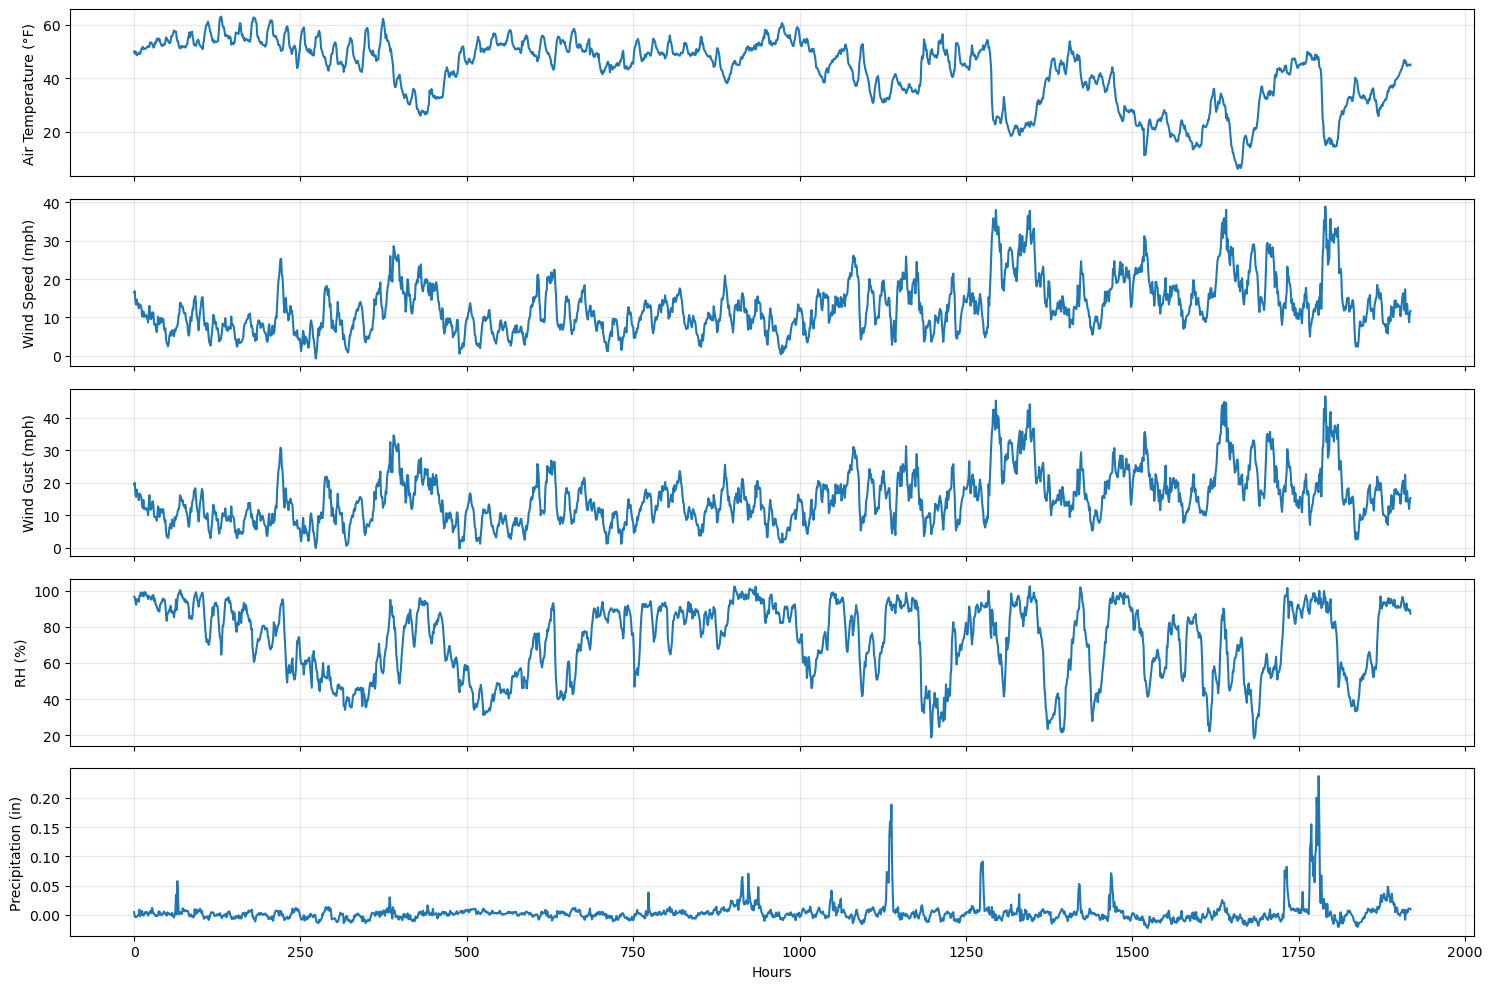

In [29]:
# This is just the predictions, feel free to delete. 

y_pred = trained_model().predict(X_true_test_filtered)

fig, axs = plt.subplots(5, 1, figsize=(15, 10), sharex=True)
labels = ['Air Temperature (°F)', 'Wind Speed (mph)', 'Wind Gust (mph)', 'RH (%)', 'Precipitation (in)']
for i, (ax, label) in enumerate(zip(axs, labels)):
    ax.plot(y_pred[:, i])
    ax.set_ylabel(label)
    ax.grid(True, alpha=0.3)
axs[-1].set_xlabel('Hours')
plt.tight_layout()
plt.show()

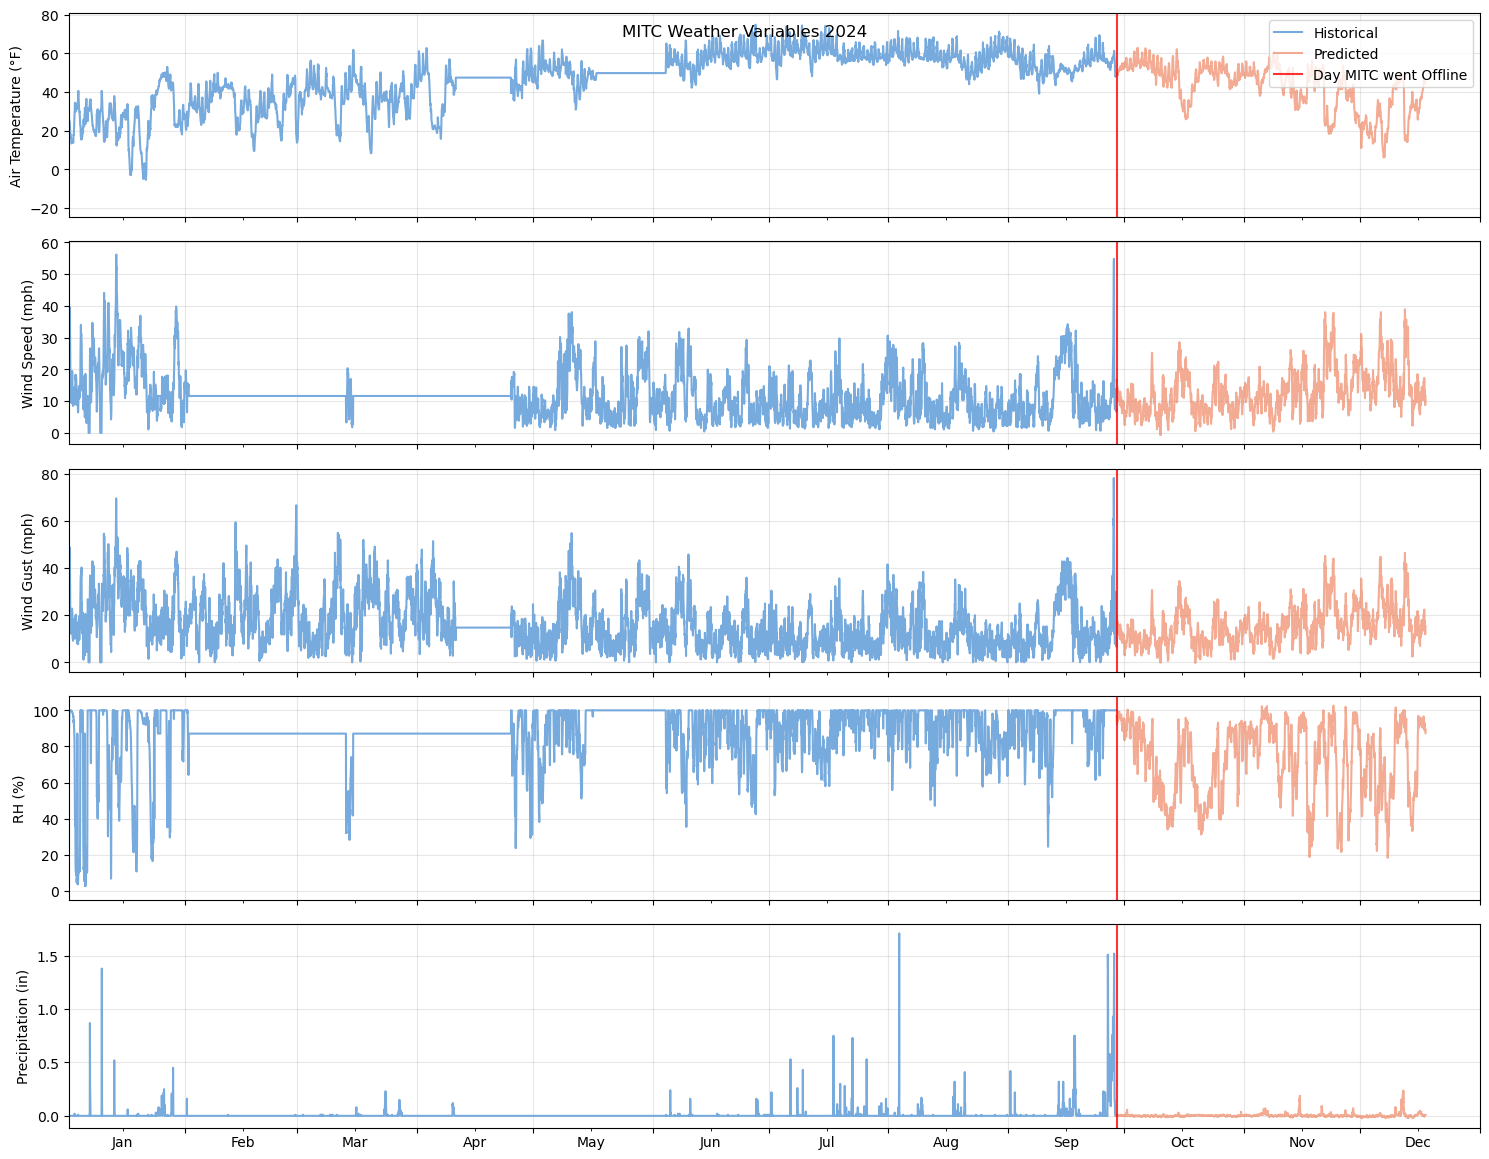

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Create figure
fig, axs = plt.subplots(5, 1, figsize=(15, 12), sharex=True)
fig.subplots_adjust(hspace=0.1)

labels = ['Air Temperature (°F)', 'Wind Speed (mph)', 'Wind Gust (mph)', 'RH (%)', 'Precipitation (in)']
variables = ['MITC_airtemp_degF', 'MITC_windspeed_mph', 'MITC_windgust_mph', 
            'MITC_rh_percent', 'MITC_precip_in']

# Get transition date where predictions start
transition_date = pd.Timestamp('2024-09-28')

# Convert prediction dates to matplotlib date numbers
pred_dates = pd.date_range(start=transition_date, periods=len(y_pred), freq='h')
pred_dates_num = mdates.date2num(pred_dates)

for i, (ax, label, var) in enumerate(zip(axs, labels, variables)):
    # Plot historical data
    mask = df[var].notna()
    historical_dates = mdates.date2num(np.array(df.loc[mask, 'observation_datetime']))
    historical_values = df.loc[mask, var].values
    
    # Using plot instead of plot_date
    line1, = ax.plot(historical_dates, historical_values,
                     color='#77aadd', alpha=1.0, label='Historical')
    
    line2, = ax.plot(pred_dates_num, y_pred[:, i],
                     color='#ee8866', alpha=0.7, label='Predicted')
    
    # Add transition line (now solid)
    ax.axvline(x=mdates.date2num(transition_date), color='red', linestyle='-', alpha=0.8,
               label='Day MITC went Offline' if i == 0 else "")
    
    ax.set_ylabel(label)
    ax.grid(True, alpha=0.3)
    
    if i == 0:
        ax.legend(loc='upper right')

# Format x-axis
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

plt.setp(axs[-1].xaxis.get_minorticklabels(), rotation=0)

# Set x-axis limits to 2024
x_min = mdates.date2num(pd.Timestamp('2024-01-01'))
x_max = mdates.date2num(pd.Timestamp('2024-12-31'))
plt.xlim(x_min, x_max)

plt.suptitle('MITC Weather Variables 2024', y=0.95)
plt.tight_layout()
plt.show()

#### Your final decision

Given all your evaluation, it's time to make a final decision on whether you believe this model provides sufficient skill for the task at hand. Go back and review your problem statement. Does this model deliver the results needed?

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3g</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 3g. Then  make a final decision on whether this model delivers on the results needed with supporting justification. Include the following:
    <ul>
        <li>Which environmental variables had the best evaluation metrics? List some physical scientific reasons why this may be the case.</li>
        <li>Is this model ready for use in the real world? Why or Why not?</li>
        <li>What other possible changes could further improve this model?</li>
    </ul>
    </p>
</div>